# Homework 07: The Normal Distribution, The Central Limit Theorem, Confidence Intervals
***

**Name**: Matthew Riopelle

***

This assignment is due on Canvas by **6:00PM on Friday October 28**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

For this HW you will want to import a few of the usuals:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import norm

# Problem 1
***
We are going to look at some data from an insurance company that insures teenage drivers. `insurance.csv` is a sample of 1000 males and 1000 females all of whose ages are between 16 and 19 inclusive.

This insurance company has decided to use 'sex' as a proxy for deciding how large of a premium to charge for car insurance.

Read in the csv file `insurance.csv`.

### Part A
***(1 point)*** Load the `csv` file into a dataframe and call it `dfInsurance`:

In [2]:
# Read 'insurance' into dfInsurance
dfInsurance = pd.read_csv("insurance.csv")

### Part B
***(1 point)*** Take a look at the data.

In [5]:
# Take a look at the data here:
dfInsurance

,Sex,miles driven,Age,Citations
0,F,4200.826390,18,0
1,F,5468.727014,17,0
2,F,5282.253745,18,0
3,F,5060.526521,17,0
4,F,5101.878224,16,2
...,...,...,...,...
1995,M,8433.768080,17,1
1996,M,8047.929523,18,1
1997,M,7285.647012,18,1
1998,M,8579.702457,18,0


### Data Description:

This data contains records from a number of teenage drivers. The drivers were observed for 12 months and the number of miles they drove and the number of citations they received were recorded. Citations were for wreckless driving, disobeying traffic laws, speeding, and/or accidents.

$\color{red}{\text{Sex}}$ - This is the sex of the driver.

$\color{red}{\text{miles driven}}$ - This is the number of miles driven during the observation period.

$\color{red}{\text{Age}}$ - This is the age of the driver at the beginning of the observation period.

$\color{red}{\text{Citations}}$ - This is the number of citations received by the driver.


### Part C
***(2 points)*** Which sex has more overall citations?

In [10]:
# Code here to print your answer:
maleCit = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'Citations'].sum()
femaleCit = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'Citations'].sum()
print("Males had more citations than females at {} citations, while females had {} citations.".format(maleCit, femaleCit))

Males had more citations than females at 468 citations, while females had 397 citations.


### Part D
***(2 points)*** Find the mean number of citations received by males and the mean number of citations received by females. Who received more citations in the year?


In [14]:
#Code your answer here:
meanmaleCit = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'Citations'].mean()
meanfemaleCit = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'Citations'].mean()
print("Males had more on average, receiving {} citations per person, while females received {} citations per person.".format(meanmaleCit, meanfemaleCit))

Males had more on average, receiving 0.468 citations per person, while females received 0.397 citations per person.


### Part E
***(3 points)*** Estimate the difference in population means (for citations received) by creating a 95% CI for the difference between the sample means for number of citations received by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

In [167]:
# Code your answer here:
maleDev = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'Citations'].std()
maleCount = dfInsurance.loc[dfInsurance['Sex'] == 'M'].count()
femaleDev = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'Citations'].std()
femaleCount = dfInsurance.loc[dfInsurance['Sex'] == 'F'].count()
upperInterval = (meanmaleCit - meanfemaleCit) + 1.96 * np.sqrt(((maleDev ** 2)/maleCount) + ((femaleDev ** 2)/femaleCount))
lowerInterval = (meanmaleCit - meanfemaleCit) - 1.96 * (np.sqrt(((maleDev ** 2)/maleCount) + ((femaleDev ** 2)/femaleCount)))
print("Upper Interval: {}".format(upperInterval))
print("Lower Interval: {}".format(lowerInterval))
print("The 95% confidence interval for the difference between the sample means of citations by gender is: [0.002833, 0.139167]")

Upper Interval: Sex             0.139167
miles driven    0.139167
Age             0.139167
Citations       0.139167
CPM             0.139167
dtype: float64
Lower Interval: Sex             0.002833
miles driven    0.002833
Age             0.002833
Citations       0.002833
CPM             0.002833
dtype: float64
The 95% confidence interval for the difference between the sample means of citations by gender is: [0.002833, 0.139167]


### Part F
***(1 point)*** Is 0 inside the confidence interval? Describe the meaning of your results.


Solution here:
Zero is not inside of my confidence interval! While we can't say anything definitive about these differences of means, 0 not being in this confidence interval indicates that for this specific interval 0 is not included. However, we can not confirm the real difference is zero, nor we can we disprove 0 as a possible difference given this information. What we can say is that by taking the difference of sample means, we are confident that the actual difference of means will be present within the resulting interval 95 times out of 100. This interval is one such example of those 100 intervals, however we cannot say whether it is part of the 95 intervals which contain the real diff of means, or if it part of the 5 that do not.

### Part G
***(4 points)*** Compare the number of miles driven per year by each sex. Start by getting a visual representation of the number of miles driven by each sex. Graph both male and female 'miles driven' distributions in the same frame for comparison.


<BarContainer object of 2 artists>

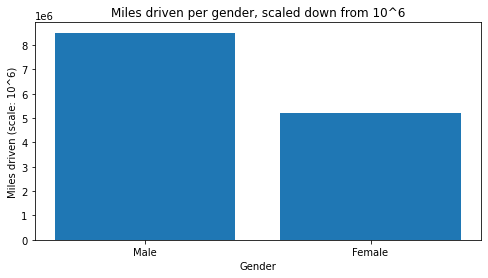

In [64]:
# Code your answer here:
maleMiles = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'miles driven'].sum()
femaleMiles = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'miles driven'].sum()
fig, ax = plt.subplots(figsize=(8,4))
genders = ['Male', 'Female']
numMiles = [maleMiles, femaleMiles]
ax.set_xlabel("Gender")
ax.set_ylabel("Miles driven (scale: 10^6)")
ax.set_title("Miles driven per gender, scaled down from 10^6")
ax.bar(genders, numMiles)

### Part H
***(1 point)*** Based on the distributions, who appears to drive more miles in a year? Is there any overlap of histograms? Describe what you have found.

Solution: Males drive more miles in a year! It would make no sense for there to be overlap of the histograms, since we are simply taking the count of total miles, per a set binary value (Male or Female). Overlap isn't possible because in this data set, you are either male or female, it is impossible to be both or none.

### Part I
***(2 points)*** What is the difference in mean miles driven by the two groups (male and female)?

In [69]:
# Code solution here:
meanMaleMiles = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'miles driven'].mean()
meanFemaleMiles = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'miles driven'].mean()
diffInMeanMiles = meanMaleMiles - meanFemaleMiles
print("The difference in mean miles between males and females is: {}".format(diffInMeanMiles))

The difference in mean miles between males and females is: 3291.516906011987


### Part J
***(3 points)*** Estimate the difference in population means (for miles driven) by creating a 95% CI for the difference between the sample means for 'miles driven' by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.

In [115]:
# Code solution here:
milesMaleVar = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'miles driven'].var()
milesFemaleVar = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'miles driven'].var()
milesUpperInterval = diffInMeanMiles + 1.96 * np.sqrt((milesMaleVar/ maleCount) + (milesFemaleVar / femaleCount))
milesLowerInterval = diffInMeanMiles - 1.96 * np.sqrt((milesMaleVar/ maleCount) + (milesFemaleVar / femaleCount))
print("Upper Interval: {}".format(milesUpperInterval))
print("Lower Interval: {}".format(milesLowerInterval))
print("The 95% confidence interval for the difference in mean miles between genders is: [3243.60, 3339.425]")

Upper Interval: Sex             3339.425283
miles driven    3339.425283
Age             3339.425283
Citations       3339.425283
dtype: float64
Lower Interval: Sex             3243.608529
miles driven    3243.608529
Age             3243.608529
Citations       3243.608529
dtype: float64
The 95% confidence interval for the difference in mean miles between genders is: [3243.60, 3339.425]


### Part K
***(1 points)*** Is 0 in the interval? Describe your findings.

Solution:
0 is not in the interval in this case! It seems EXTREMELY unlikely that the difference in mean miles is equal to zero given this confidence interval. However, this does not mean that it is impossible for the true means to be equal. This is simply 1 example out of 100 intervals, 95 of which contain the true difference of means, while 5 do not contain the true difference of means. We can not say definitively whether or not the true difference of means lies within the above interval, just that it is a possible example of the many different intervals that could be generated.

### Part L
***(4 points)*** Create a column called 'CPM'(this acronym stands for citations per 1000 miles), and put in it the number of citations divided by the number of miles driven (multiplied by 1000). The multiplication by 1000 ensures we are looking at citations per 1000 miles. This is done because the numbers are so small.

After you create the 'CPM' column look at the tail of the dataframe.

In [89]:
# Code your solution here:
dfInsurance['CPM'] = (dfInsurance['Citations'])/(dfInsurance['miles driven']) * 1000
dfInsurance.tail(10)

,Sex,miles driven,Age,Citations,CPM
1990,M,8230.936727,17,2,0.242986
1991,M,8289.641882,19,0,0.000000
1992,M,8616.735195,18,2,0.232106
1993,M,7596.588888,17,0,0.000000
1994,M,7833.838815,18,2,0.255303
1995,M,8433.768080,17,1,0.118571
1996,M,8047.929523,18,1,0.124256
1997,M,7285.647012,18,1,0.137256
1998,M,8579.702457,18,0,0.000000
1999,M,7868.067827,16,0,0.000000


### Part M
***(2 points)*** Look at the difference in means for male CPM and female CPM. Which sex receive more citations per 1000 miles?

In [93]:
# Code solution here:
maleMeanCPM = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'CPM'].mean()
femaleMeanCPM = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'CPM'].mean()
print("Mean citations per 1000 miles for males: {}".format(maleMeanCPM))
print("Mean citations per 1000 miles for females: {}".format(femaleMeanCPM))
diffMeanCPM = femaleMeanCPM - maleMeanCPM
print("It appears that females receive roughly {} more citations per 1000 miles than males do, on average.".format(diffMeanCPM))

Mean citations per 1000 miles for males: 0.05507130697693171
Mean citations per 1000 miles for females: 0.07673198964860108
It appears that females receive roughly 0.021660682671669367 more citations per 1000 miles than males do, on average.


### Part N
***(1 point)*** You should have discovered that females get more citations per mile than do males. How does this go together with the fact that males get more citations in a year?

Solution:If males get more citations per year, but females get more citations per miles, this must mean that the men are driving a lot further than the women. The only way to offset a high number of citations is to drive more miles. For example, someone who has driven 1000 miles and has 1 citation will have more citations per 1000 miles than someone who has 5 citations, but driven for 10,000 miles (1 CPM vs 0.5 CPM)


### Part O
***(3 points)*** Estimate the difference in population means (for CPM's) by creating a 95% CI for the difference between the sample means for 'CPM' for males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.


In [102]:
# Code solution here:
femaleCPMvar = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'CPM'].var()
maleCPMvar = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'CPM'].var()
CPMupperInterval = diffMeanCPM + (1.96 * np.sqrt((femaleCPMvar/femaleCount) + (maleCPMvar/maleCount)))
CPMlowerInterval = diffMeanCPM - (1.96 * np.sqrt((femaleCPMvar/femaleCount) + (maleCPMvar/maleCount)))
print("The upper interval for difference of CPM is: {}".format(CPMupperInterval))
print("The lower interval for difference of CPM is: {}".format(CPMlowerInterval))
print("The 95% confidence interval for the difference in mean CPM is: [0.010832,0.032489]")

The upper interval for difference of CPM is: Sex             0.032489
miles driven    0.032489
Age             0.032489
Citations       0.032489
dtype: float64
The lower interval for difference of CPM is: Sex             0.010832
miles driven    0.010832
Age             0.010832
Citations       0.010832
dtype: float64
The 95% confidence interval for the difference in mean CPM is: [0.010832,0.032489]


### Part P
***(1 point)*** Does your result contain 0? Describe your findings.

Solution:
My result does not contain a zero. Once again, however, it is not impossible for the true difference of means to be zero. This result is simply 1 interval of 100 intervals, 95 of which contain the true difference of means in their interval, while the other 5 do not. There is no way to tell exactly what the mean difference is given a single confidence interval, as we do not know if this one interval contains the mean or not.

### Part Q
***(1 point)*** Can you explain why males pay higher insurance premiums when they receive fewer citations per mile? Hint: is insurance typically sold by the mile or by the year?

Solution: Males will pay higher insurance premiums based on this data. Although females have more citations per mile than males, they drive a whole lot less than males, on average. It is for this reason that males pay higher premiums, because they drive a lot more. Just because the females have more citations does not necessarily mean that they pay more, because they do indeed drive less. This is likely due to the fact that the more you drive, the higher likelihood you have of getting into an accident and/or getting a citation.


### Part R
***(2 points)*** Consider the graphic below. It is merely a cut-and-past .png, it isn't live code.

Look at the code and the graphic and describe what story it tells.

![title](code.png)
![title](graph.png)

In [13]:
# The graphic above was created with this code.
# Of course this code will likely not work in your notebook since
# you have different variable names. This is why it is commented out.

#mCPM = dfInsurance.loc[dfInsurance['Sex']=='M', 'CPM'].values
#fCPM = dfInsurance.loc[dfInsurance['Sex']=='F', 'CPM'].values

#bins = np.linspace(0.001, 0.6, 8)
#plt.hist([mCPM, fCPM], bins, label=['male', 'female'])
#plt.legend(loc='upper right')
#plt.show()

Solution:
This graph is showing the frequences of citations per mile, based on gender. For example, it is showing that roughly 175 males and roughly 20 females have just 0.1 CPM. We can see that there are more females than males receiving 0.2, 0.4, 0.5, and 0.6 citations per 1000 miles. However, we can see that there are more males receiving 0.1, or 0.3 citations per 1000 miles.

In [142]:
# Code your solution here:
milesMaleStd = dfInsurance.loc[dfInsurance['Sex'] == 'M', 'miles driven'].std()
convertedStd = milesMaleStd/np.sqrt(maleCount)
malelowerZ = (6400 - meanMaleMiles)/convertedStd
maleupperZ = (8400 - meanMaleMiles)/convertedStd
maleP = stats.norm.cdf(maleupperZ) - stats.norm.cdf(malelowerZ)
print(maleP)
print("Males have a 1.1509e-07% chance of driving between 6400 and 8400 miles per year".format(maleP * 100))
milesFemaleStd = dfInsurance.loc[dfInsurance['Sex'] == 'F', 'miles driven'].std()
femconvertSTD = milesFemaleStd/np.sqrt(femaleCount)
lowerZ = (6400 - meanFemaleMiles)/femconvertSTD
upperZ = (8400 - meanFemaleMiles)/femconvertSTD
femaleP = stats.norm.cdf(upperZ) - stats.norm.cdf(lowerZ)
print(femaleP)
print("Females have virtually no chance of driving between 6400 and 8400 miles per year")

[1.15095205e-09 1.15095205e-09 1.15095205e-09 1.15095205e-09]
Males have a 1.1509e-07% chance of driving between 6400 and 8400 miles per year
[0. 0. 0. 0.]
Females have virtually no chance of driving between 6400 and 8400 miles per year


### Part T
***(4 points)*** 95% of females drive less than x miles. What is x? (Again, assume miles driven
by females follows a normal distribution with mean and standard deviation equal to the
sample mean and sample std deviation found above)


In [159]:
# Code your solution here:
#value that we want our x -mean/std to equal, went to 1.64, 1.65 in z score table, found value in middle
print(stats.norm.cdf(1.645))
x = (1.645 * femconvertSTD) + meanFemaleMiles
print(x)
print("95% of females drive less than 5243.602672 miles a year!".format(x))

0.9500150944608786
Sex             5243.602672
miles driven    5243.602672
Age             5243.602672
Citations       5243.602672
dtype: float64
95% of females drive less than 5243.602672 miles a year!


# Problem 2
***

Let $X$ be a normal random variable, $X \sim N(\mu, \sigma^2) = N(5,9)$.

Let $Z$ be a $\color{red}{\text{standard}}$ normal random variable, $Z \sim N(\mu, \sigma^2) = N(0,1)$.


### Part A

***(2 points)*** Compute $P(X \leq 8.75)$.

In [161]:
# Code your solution here:
mean = 5
std = 3
prob = stats.norm.cdf((8.75 - 5)/3)
print("P(X <= 8.75) = {}".format(prob))

P(X <= 8.75) = 0.8943502263331446


### Part B

***(2 points)*** Compute $P(Z\leq 1.25)$.

In [162]:
# Code your solution here:
prob2 = stats.norm.cdf(1.25)
print("P(Z <= 1.25) = {}".format(prob2))

P(Z <= 1.25) = 0.8943502263331446


### Part C

***(2 points)*** Explain why the answer to these first two questions are the same.

Solution:
These two answers are the same because they are asking for the exact same thing. Part B is just the Z-score equivalent (standardized) of part A. 8.75-5/3 is 1.25, much like x-5/3 is Z. Therefore, $P(X \leq 8.75)$ is the same as $P(Z \leq 1.25)$ given this mean and standard deviation.